In [9]:
## load libraries
# suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
# suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
# suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
# suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
# suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
# suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
# suppressWarnings(suppressPackageStartupMessages(library(scater)))
# suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
# suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
# suppressWarnings(suppressPackageStartupMessages(library(limma)))
# suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
# suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
# suppressWarnings(suppressPackageStartupMessages(library(GGally)))
# suppressWarnings(suppressPackageStartupMessages(library(scran)))
# suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
# suppressWarnings(suppressPackageStartupMessages(library(circlize)))

In [5]:
clusters_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/ase_env_interactions/eqtl_clustering/cluster_significant_linear_psuedotime_ase_interactions_qval_0.01.tsv"
clusters = read.csv(clusters_filename, sep = "\t")
head(clusters)

gene_id,snp_id,exp_cluster_label,ase_cluster_label,comb
ENSG00000107798,10_91004886_A_G,0,0,0_0
ENSG00000183722,13_40081401_T_A,0,0,0_0
ENSG00000001460,1_24754406_T_A,0,0,0_0
ENSG00000124839,2_238552006_C_T,0,0,0_0
ENSG00000170291,17_7151111_A_C,0,0,0_0
ENSG00000151640,10_133978507_G_T,0,0,0_0


In [3]:
####################
#### Figure S12 ####
####################

In [6]:
gtex_tagging_filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/qtl_annotation/all_results_combined.tsv.all_gtex_gwas_tagging_annotations.1000g_ref.txt"
gtex_tagging = read.csv(gtex_tagging_filename, sep = "\t")

In [10]:
gtex_tagging$gene_id = gsub("*_.*", "", gtex_tagging$feature)
gtex_dynamic = inner_join(clusters, gtex_tagging, by = c("gene_id","snp_id"))

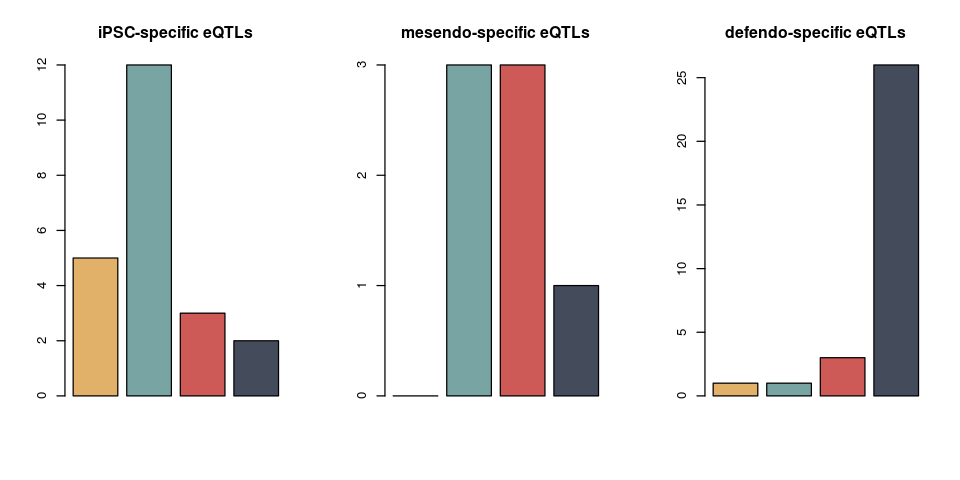

In [11]:
par(mfrow = c(1,3))
options(repr.plot.width = 8, repr.plot.height = 4)
barplot(c(nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "ips" & 
                  gtex_dynamic$ase_cluster_label == '0',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "ips" & 
                  gtex_dynamic$ase_cluster_label == '2',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "ips" & 
                  gtex_dynamic$ase_cluster_label == '3',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "ips" & 
                  gtex_dynamic$ase_cluster_label == '1',])), col = c("#e1b16a", "#78a5a3","#ce5a57","#444c5c"),
       main = "iPSC-specific eQTLs")
barplot(c(nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "mesendo" & 
                  gtex_dynamic$ase_cluster_label == '0',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "mesendo" & 
                  gtex_dynamic$ase_cluster_label == '2',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "mesendo" & 
                  gtex_dynamic$ase_cluster_label == '3',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "mesendo" & 
                  gtex_dynamic$ase_cluster_label == '1',])), col = c("#e1b16a", "#78a5a3","#ce5a57","#444c5c"), 
        yaxt = 'n', main = "mesendo-specific eQTLs")
axis(side = 2, at = c(0,1,2,3))
barplot(c(nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "defendo" & 
                  gtex_dynamic$ase_cluster_label == '0',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "defendo" & 
                  gtex_dynamic$ase_cluster_label == '2',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "defendo" & 
                  gtex_dynamic$ase_cluster_label == '3',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'True' & gtex_dynamic$stage == "defendo" & 
                  gtex_dynamic$ase_cluster_label == '1',])), col = c("#e1b16a", "#78a5a3","#ce5a57","#444c5c"),
       main = "defendo-specific eQTLs")

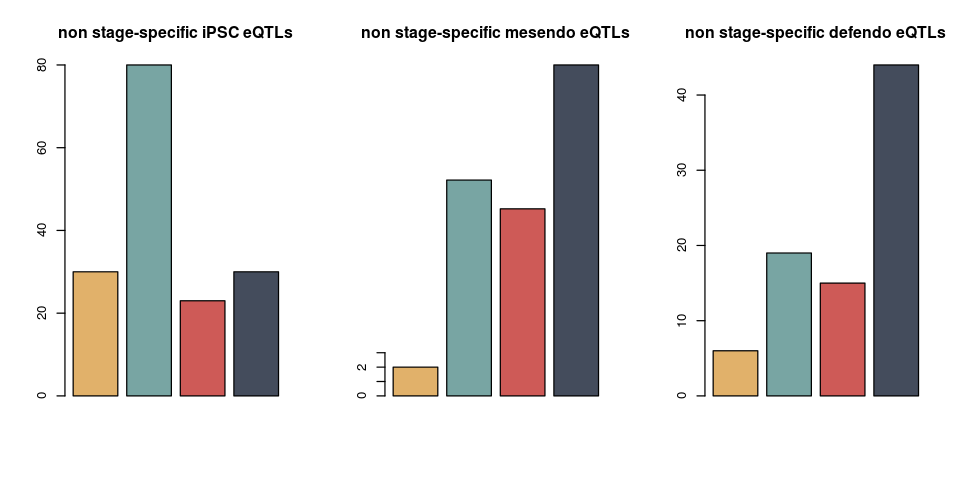

In [12]:
par(mfrow = c(1,3))
options(repr.plot.width = 8, repr.plot.height = 4)
barplot(c(nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "ips" & 
                  gtex_dynamic$ase_cluster_label == '0',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "ips" & 
                  gtex_dynamic$ase_cluster_label == '2',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "ips" & 
                  gtex_dynamic$ase_cluster_label == '3',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "ips" & 
                  gtex_dynamic$ase_cluster_label == '1',])), col = c("#e1b16a", "#78a5a3","#ce5a57","#444c5c"),
       main = "non stage-specific iPSC eQTLs")
barplot(c(nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "mesendo" & 
                  gtex_dynamic$ase_cluster_label == '0',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "mesendo" & 
                  gtex_dynamic$ase_cluster_label == '2',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "mesendo" & 
                  gtex_dynamic$ase_cluster_label == '3',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "mesendo" & 
                  gtex_dynamic$ase_cluster_label == '1',])), col = c("#e1b16a", "#78a5a3","#ce5a57","#444c5c"), 
        yaxt = 'n', main = "non stage-specific mesendo eQTLs")
axis(side = 2, at = c(0,1,2,3))
barplot(c(nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "defendo" & 
                  gtex_dynamic$ase_cluster_label == '0',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "defendo" & 
                  gtex_dynamic$ase_cluster_label == '2',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "defendo" & 
                  gtex_dynamic$ase_cluster_label == '3',]),
         nrow(gtex_dynamic[gtex_dynamic$stage_specific == 'False' & gtex_dynamic$stage == "defendo" & 
                  gtex_dynamic$ase_cluster_label == '1',])), col = c("#e1b16a", "#78a5a3","#ce5a57","#444c5c"),
       main = "non stage-specific defendo eQTLs")

In [ ]:
####################
#### Figure S13 ####
####################